In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

C:\Users\86186\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\86186\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
# 保留数据前两个成分
pca = PCA(n_components=2)
# 拟合pca
pca.fit(X_scaled)
# 变换到前两个方向
X_pca = pca.transform(X_scaled)
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0, 0.5, 'Principal components')

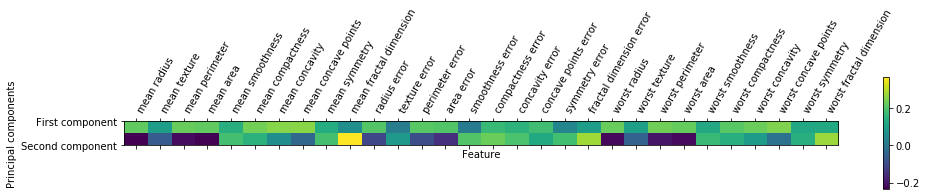

In [4]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

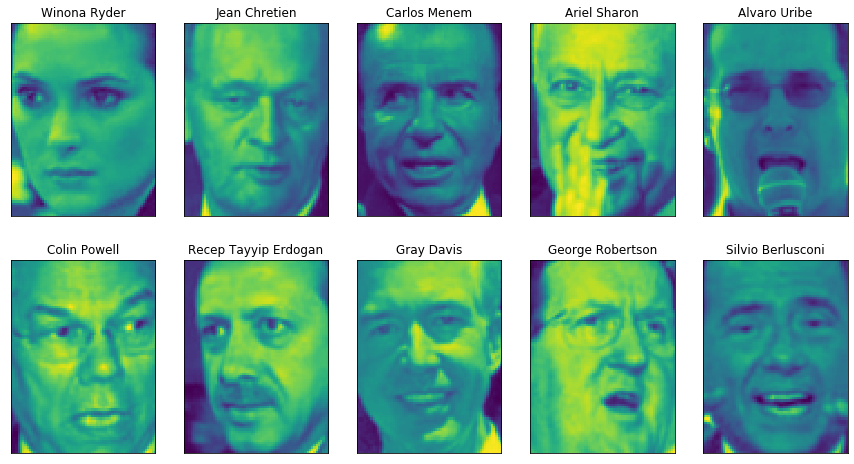

In [5]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape
fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [6]:
print("people.images.shape:{}".format(people.images.shape))
print("Numbers of classes:{}".format(len(people.target_names)))

people.images.shape:(3023, 87, 65)
Numbers of classes:62


In [7]:
#计算每个目标出现次数
counts=np.bincount(people.target)
#打印结果
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25}{1:3}".format(name,count),end='   ')
    if(i+1)%3==0:
        print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

In [8]:
#每个人只取50张图像，降低被George W Bush影响，（数据偏斜）

mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people=people.data[mask]
y_people=people.target[mask]

#将灰度值缩放到0-1之间而不是0-255
#以得到更好的数据稳定性
X_people=X_people/255.

In [ ]:
#人脸识别常见任务时识别人脸是否属于数据库
#常用方法是构建一个分类器，但是同一个人图象数少，且需经常添加新人物
#简单方法是knn，原则可以处理每个类别只有一个样本的情况

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 分割数据
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 构建分类器
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


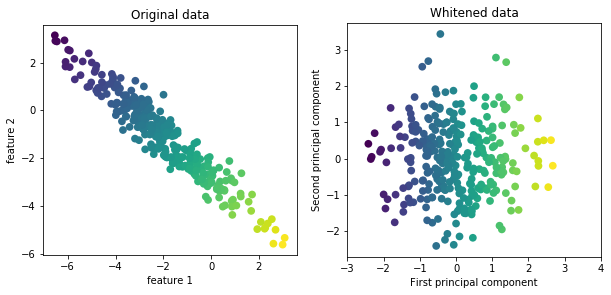

In [11]:
mglearn.plots.plot_pca_whitening()
#将主成分缩放到相同的尺度

In [12]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

#精度提高，主成分给出了更好的数据表示

Test set accuracy: 0.31


In [14]:
#主成分对应输入空间里的方向
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


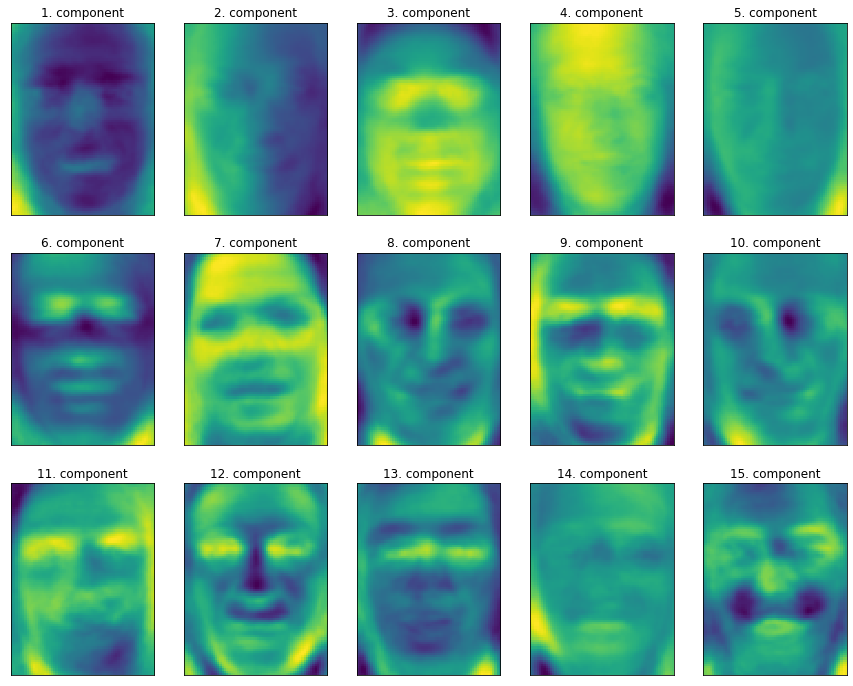

In [15]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.2s, 0.0min


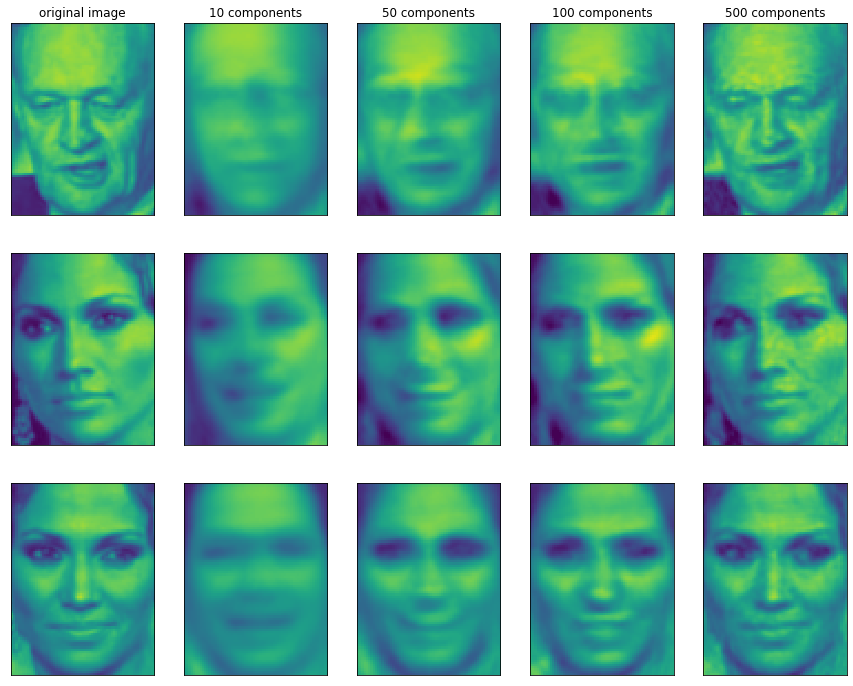

In [17]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

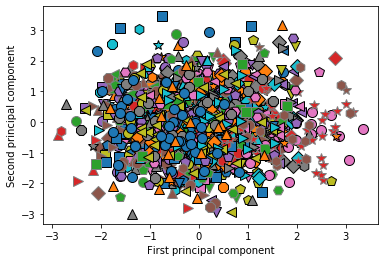

In [18]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
#利用前两个主成分绘制人脸数据集的散点图